In [538]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

file_path = "/content/drive/MyDrive/ObesityDataSet.csv"


Mounted at /content/drive


In [539]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

In [540]:
df = pd.read_csv(file_path, na_values='?', skipinitialspace=True)

In [541]:
df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF                             20

In [543]:
df.describe(include='all')

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2089.000000,2089,2089.000000,2092.000000,2091,2089,2093.000000,2089.000000,2093,2098,2096.000000,2088,2092.000000,2096.000000,2093,2099,2111
unique,NaN,2,NaN,NaN,4,2,NaN,NaN,2,2,NaN,2,NaN,NaN,4,5,7
top,NaN,Male,NaN,NaN,Sometimes,yes,NaN,NaN,no,no,NaN,yes,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,NaN,1056,NaN,NaN,1386,1844,NaN,NaN,1997,2054,NaN,1705,NaN,NaN,1747,1572,351
mean,24.717928,NaN,1.706623,88.608184,NaN,NaN,2.443519,2.729418,NaN,NaN,2.030560,NaN,1.073435,0.680138,NaN,NaN,NaN
std,8.391323,NaN,0.117700,36.154617,NaN,NaN,0.642754,0.981124,NaN,NaN,0.737945,NaN,1.149364,0.717160,NaN,NaN,NaN
min,14.000000,NaN,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,19.955257,NaN,1.630000,66.000000,NaN,NaN,2.000000,2.675411,NaN,NaN,1.569911,NaN,0.129009,0.000000,NaN,NaN,NaN
50%,22.814657,NaN,1.701284,83.000000,NaN,NaN,2.397284,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625360,NaN,NaN,NaN
75%,26.000000,NaN,1.770000,108.055736,NaN,NaN,3.000000,3.000000,NaN,NaN,2.482454,NaN,1.683612,1.000000,NaN,NaN,NaN


In [544]:
numeric_cols = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

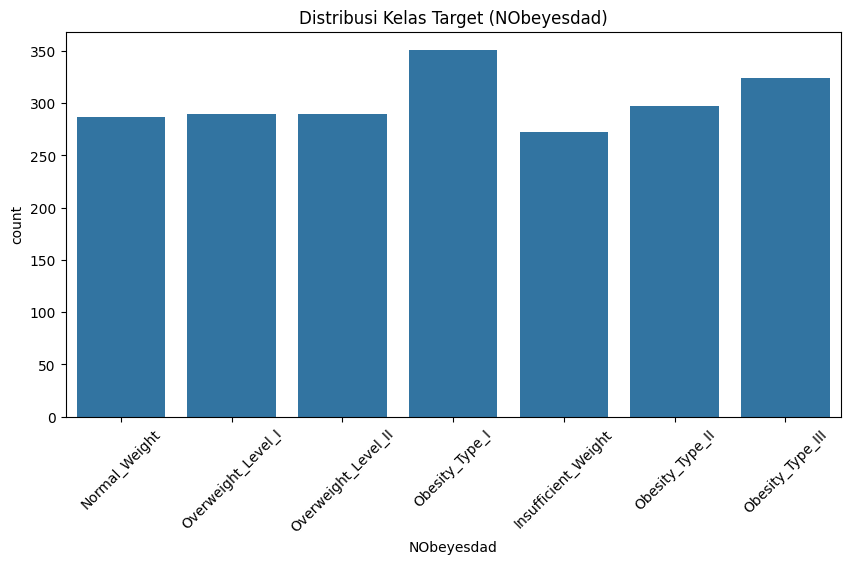

In [545]:
# 3. Visualisasi data
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='NObeyesdad')
plt.title('Distribusi Kelas Target (NObeyesdad)')
plt.xticks(rotation=45)
plt.show()

In [546]:
#  Cek missing values
df.isnull().sum()

,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


In [547]:
#  Nilai unik per kolom
df.nunique()

,0
Age,1393
Gender,2
Height,1561
Weight,1517
CALC,4
FAVC,2
FCVC,807
NCP,636
SCC,2
SMOKE,2


In [548]:
# Cek data duplikat
duplicates = df.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")


Jumlah data duplikat: 18


In [549]:
# Cek keseimbangan kelas target
print("\n=== Distribusi kelas target ===")
print(df['NObeyesdad'].value_counts())


=== Distribusi kelas target ===
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


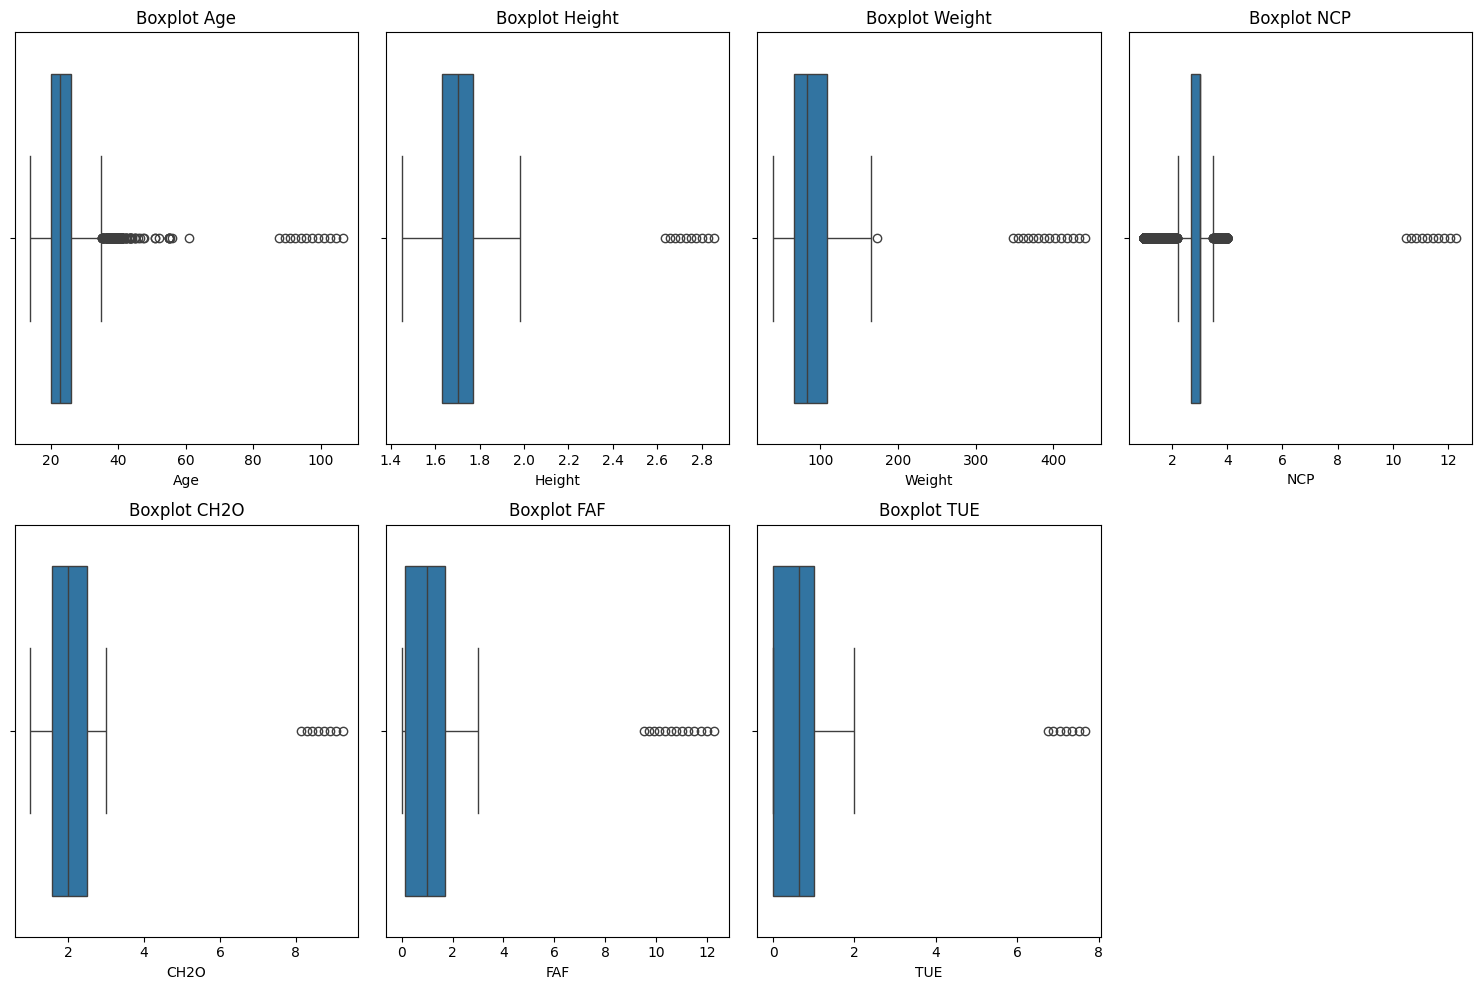

In [550]:
# %%
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2,4,i+1)
    # Drop missing values from the column before plotting
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# Kesimpulan EDA

# PreProcessing

In [551]:
#cek missing value sebelum dibersihkan
print(df.isnull().sum())

Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [552]:
# Mengisi missing values untuk kolom numerik dengan nilai rata-rata
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)

# Mengisi missing values untuk kolom kategorikal dengan modus (nilai paling sering)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['CALC'].fillna(df['CALC'].mode()[0], inplace=True)
df['FAVC'].fillna(df['FAVC'].mode()[0], inplace=True)
df['FCVC'].fillna(df['FCVC'].mode()[0], inplace=True)
df['SMOKE'].fillna(df['SMOKE'].mode()[0], inplace=True)
df['CH2O'].fillna(df['CH2O'].mode()[0], inplace=True)
df['SCC'].fillna(df['SCC'].mode()[0], inplace=True)
df['family_history_with_overweight'].fillna(df['family_history_with_overweight'].mode()[0], inplace=True)
df['FAF'].fillna(df['FAF'].mode()[0], inplace=True)
df['TUE'].fillna(df['TUE'].mode()[0], inplace=True)
df['CAEC'].fillna(df['CAEC'].mode()[0], inplace=True)
df['MTRANS'].fillna(df['MTRANS'].mode()[0], inplace=True)

<ipython-input-552-05912dee5340>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-552-05912dee5340>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [553]:
#cek missing value setelah dibersihkan
print(df.isnull().sum())
print("\nMissing values setelah dibersihkan:")

Age                                0
Gender                             0
Height                             0
Weight                             0
CALC                               0
FAVC                               0
FCVC                               0
NCP                               22
SCC                                0
SMOKE                              0
CH2O                               0
family_history_with_overweight     0
FAF                                0
TUE                                0
CAEC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64

Missing values setelah dibersihkan:


In [554]:
# Menghapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris setelah menghapus duplikat: 2092


In [555]:
# Mengubah data kategorikal menjadi numerik
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

df['SMOKE'] = df['SMOKE'].map({'no': 0, 'yes': 1})

df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'no': 0, 'yes': 1})

# One-Hot Encoding untuk kolom kategori lainnya
df = pd.get_dummies(df, columns=['CALC', 'FAVC', 'FCVC', 'SCC', 'CAEC', 'MTRANS'], drop_first=True)

df.head()

,Age,Gender,Height,Weight,NCP,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,...,FCVC_8.565565914361384,FCVC_8.706794695591519,SCC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,0,1.62,64.0,3.0,0,2.0,1,0.0,1.0,...,False,False,False,False,True,False,False,False,True,False
1,21.0,0,1.52,56.0,3.0,1,3.0,1,3.0,0.0,...,False,False,True,False,True,False,False,False,True,False
2,23.0,1,1.80,77.0,3.0,0,2.0,1,2.0,1.0,...,False,False,False,False,True,False,False,False,True,False
3,27.0,1,1.80,87.0,3.0,0,2.0,0,2.0,0.0,...,False,False,False,False,True,False,False,False,False,True
4,22.0,1,1.78,89.8,1.0,0,2.0,0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False


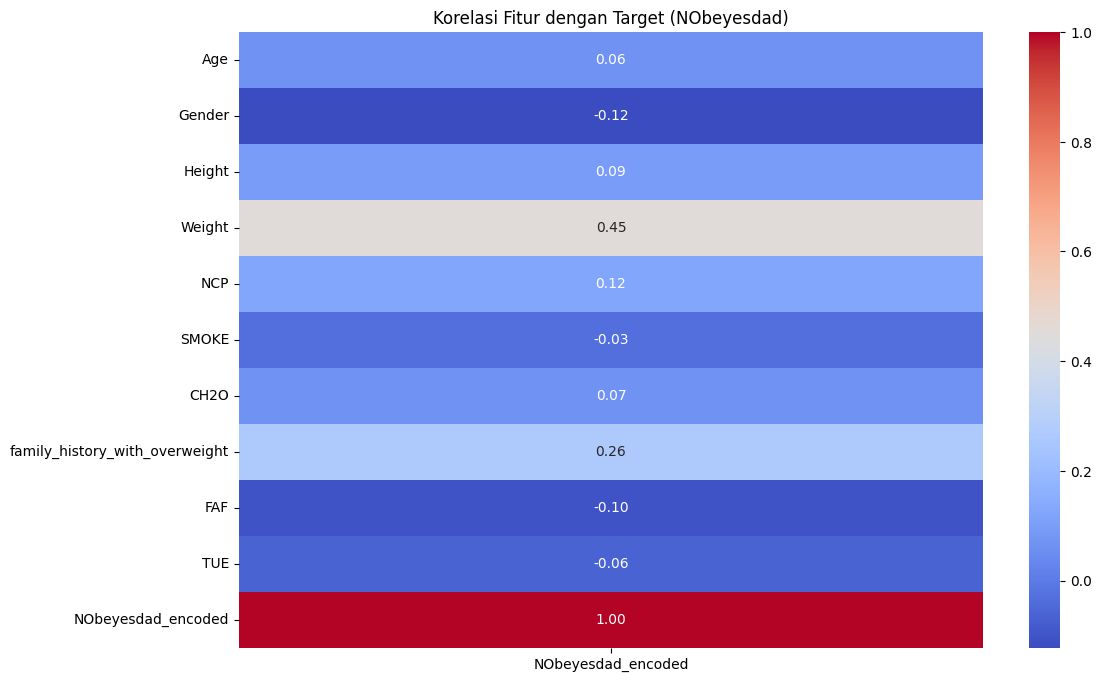

In [556]:
# Mengonversi kolom NObeyesdad menjadi numerik
df['NObeyesdad_encoded'] = pd.factorize(df['NObeyesdad'])[0]

# Menghitung korelasi antara fitur numerik dan target
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# Menampilkan korelasi antara fitur dan target
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['NObeyesdad_encoded']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Fitur dengan Target (NObeyesdad)')
plt.show()

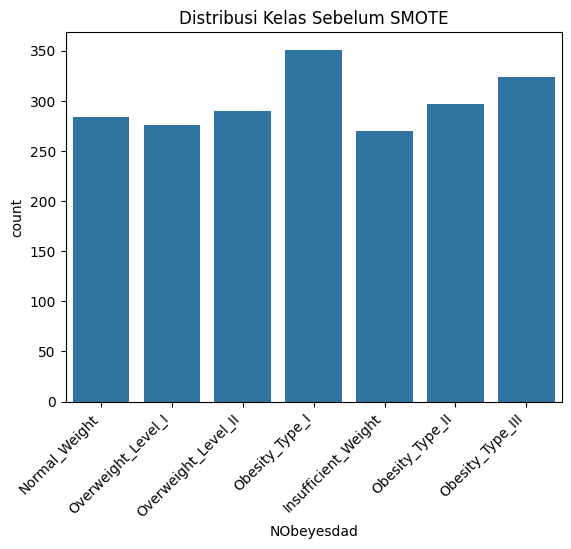

In [557]:
# Menampilkan distribusi kelas sebelum SMOTE
sns.countplot(x='NObeyesdad', data=df)
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xticks(rotation=45, ha='right')
plt.show()

Age                              0
Gender                           0
Height                           0
Weight                           0
NCP                             22
                                ..
MTRANS_Bike                      0
MTRANS_Motorbike                 0
MTRANS_Public_Transportation     0
MTRANS_Walking                   0
NObeyesdad_encoded               0
Length: 829, dtype: int64
Age                             0
Gender                          0
Height                          0
Weight                          0
NCP                             0
                               ..
MTRANS_Bike                     0
MTRANS_Motorbike                0
MTRANS_Public_Transportation    0
MTRANS_Walking                  0
NObeyesdad_encoded              0
Length: 829, dtype: int64


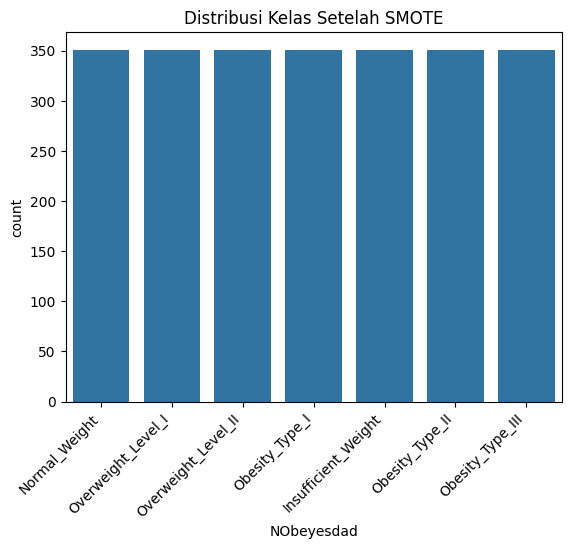

In [558]:
#Menerapkan fitur SMOTE
# Memisahkan fitur dan target
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Cek missing values di fitur X
print(X.isnull().sum())

# Mengisi missing values pada fitur X dengan mean untuk kolom numerik
X.fillna(X.mean(), inplace=True)

# Cek kembali setelah pengisian missing values
print(X.isnull().sum())

# Setelah memastikan tidak ada missing values, kita bisa melanjutkan dengan SMOTE
from imblearn.over_sampling import SMOTE

# Menggunakan SMOTE untuk menyeimbangkan kelas
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan distribusi kelas setelah SMOTE
sns.countplot(x=y_resampled)
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xticks(rotation=45, ha='right')
plt.show()

Age                             0
Gender                          0
Height                          0
Weight                          0
NCP                             0
                               ..
MTRANS_Bike                     0
MTRANS_Motorbike                0
MTRANS_Public_Transportation    0
MTRANS_Walking                  0
NObeyesdad_encoded              0
Length: 829, dtype: int64
Age                             0
Gender                          0
Height                          0
Weight                          0
NCP                             0
                               ..
MTRANS_Bike                     0
MTRANS_Motorbike                0
MTRANS_Public_Transportation    0
MTRANS_Walking                  0
NObeyesdad_encoded              0
Length: 829, dtype: int64


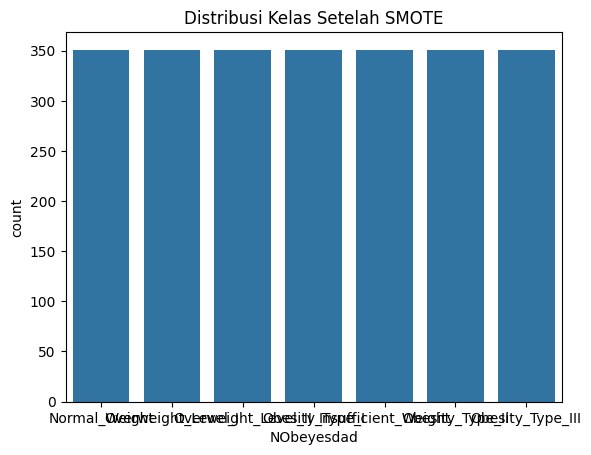

In [559]:
# Cek missing values di fitur X
print(X.isnull().sum())

# Mengisi missing values pada fitur X dengan mean untuk kolom numerik
X.fillna(X.mean(), inplace=True)

# Cek kembali setelah pengisian missing values
print(X.isnull().sum())

# Setelah memastikan tidak ada missing values, kita bisa melanjutkan dengan SMOTE
from imblearn.over_sampling import SMOTE

# Menggunakan SMOTE untuk menyeimbangkan kelas
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan distribusi kelas setelah SMOTE
sns.countplot(x=y_resampled)
plt.title('Distribusi Kelas Setelah SMOTE')
plt.show()


In [560]:
# Normalisasi kolom numerik
scaler = MinMaxScaler()

# Normalisasi kolom: 'Age', 'Height', 'Weight'
df[['Age', 'Height', 'Weight']] = scaler.fit_transform(df[['Age', 'Height', 'Weight']])

# Cek beberapa baris setelah normalisasi
df.head()

,Age,Gender,Height,Weight,NCP,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,...,FCVC_8.706794695591519,SCC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_encoded
0,0.075724,0,0.121084,0.062169,3.0,0,2.0,1,0.0,1.0,...,False,False,False,True,False,False,False,True,False,0
1,0.075724,0,0.049858,0.042275,3.0,1,3.0,1,3.0,0.0,...,False,True,False,True,False,False,False,True,False,0
2,0.097359,1,0.249290,0.094497,3.0,0,2.0,1,2.0,1.0,...,False,False,False,True,False,False,False,True,False,0
3,0.140630,1,0.249290,0.119364,3.0,0,2.0,0,2.0,0.0,...,False,False,False,True,False,False,False,False,True,1
4,0.086541,1,0.235045,0.126327,1.0,0,2.0,0,0.0,0.0,...,False,False,False,True,False,False,False,True,False,2


# Pemodelan dan Evaluasi

In [561]:
#Model Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Membuat dan melatih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)

# Prediksi dengan Decision Tree
y_pred_dt = dt_model.predict(X_resampled)

# Evaluasi model Decision Tree
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_resampled, y_pred_dt))
print("\nDecision Tree Classification Report:")
print(classification_report(y_resampled, y_pred_dt))

# Akurasi Decision Tree
accuracy_dt = accuracy_score(y_resampled, y_pred_dt)
print(f"Akurasi Decision Tree: {accuracy_dt:.2f}")


Decision Tree Confusion Matrix:
[[351   0   0   0   0   0   0]
 [  0 351   0   0   0   0   0]
 [  0   0 351   0   0   0   0]
 [  0   0   0 351   0   0   0]
 [  0   0   0   0 351   0   0]
 [  0   0   0   0   0 351   0]
 [  0   0   0   0   0   0 351]]

Decision Tree Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00       351
      Normal_Weight       1.00      1.00      1.00       351
     Obesity_Type_I       1.00      1.00      1.00       351
    Obesity_Type_II       1.00      1.00      1.00       351
   Obesity_Type_III       1.00      1.00      1.00       351
 Overweight_Level_I       1.00      1.00      1.00       351
Overweight_Level_II       1.00      1.00      1.00       351

           accuracy                           1.00      2457
          macro avg       1.00      1.00      1.00      2457
       weighted avg       1.00      1.00      1.00      2457

Akurasi Decision Tree: 1.00


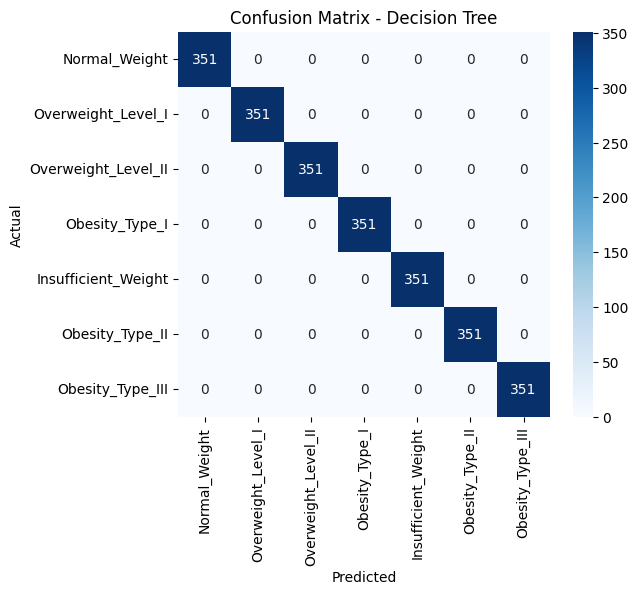

In [562]:
# Menghitung confusion matrix untuk Decision Tree
cm_dt = confusion_matrix(y_resampled, y_pred_dt)

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=df['NObeyesdad'].unique(), yticklabels=df['NObeyesdad'].unique())
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [563]:
# Mengimpor RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Prediksi dengan Random Forest
y_pred_rf = rf_model.predict(X_resampled)

# Evaluasi model Random Forest
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_resampled, y_pred_rf))
print("\nRandom Forest Classification Report:")
print(classification_report(y_resampled, y_pred_rf))

# Akurasi Random Forest
accuracy_rf = accuracy_score(y_resampled, y_pred_rf)
print(f"Akurasi Random Forest: {accuracy_rf:.2f}")

Random Forest Confusion Matrix:
[[351   0   0   0   0   0   0]
 [  0 351   0   0   0   0   0]
 [  0   0 351   0   0   0   0]
 [  0   0   0 351   0   0   0]
 [  0   0   0   0 351   0   0]
 [  0   0   0   0   0 351   0]
 [  0   0   0   0   0   0 351]]

Random Forest Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00       351
      Normal_Weight       1.00      1.00      1.00       351
     Obesity_Type_I       1.00      1.00      1.00       351
    Obesity_Type_II       1.00      1.00      1.00       351
   Obesity_Type_III       1.00      1.00      1.00       351
 Overweight_Level_I       1.00      1.00      1.00       351
Overweight_Level_II       1.00      1.00      1.00       351

           accuracy                           1.00      2457
          macro avg       1.00      1.00      1.00      2457
       weighted avg       1.00      1.00      1.00      2457

Akurasi Random Forest: 1.00


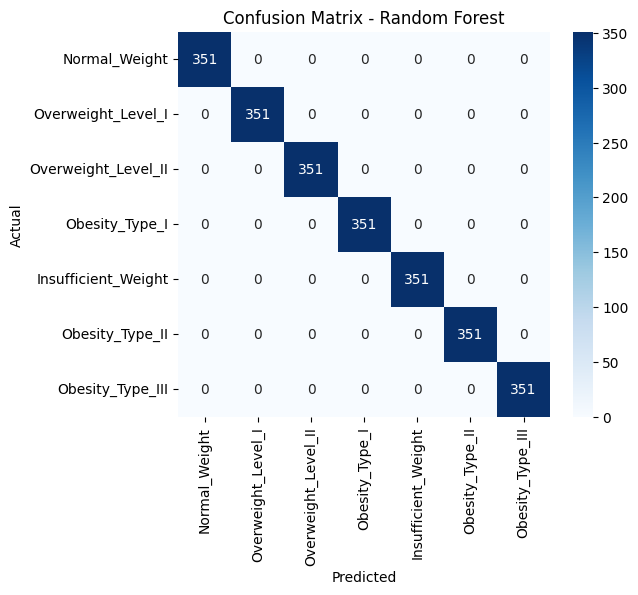

In [564]:
# Menghitung confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_resampled, y_pred_rf)

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=df['NObeyesdad'].unique(), yticklabels=df['NObeyesdad'].unique())
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [565]:
# Mengimpor LogisticRegression
from sklearn.linear_model import LogisticRegression

# Membuat dan melatih model Logistic Regression
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_resampled, y_resampled)

# Prediksi dengan Logistic Regression
y_pred_lr = lr_model.predict(X_resampled)

# Evaluasi model Logistic Regression
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_resampled, y_pred_lr))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_resampled, y_pred_lr))

# Akurasi Logistic Regression
accuracy_lr = accuracy_score(y_resampled, y_pred_lr)
print(f"Akurasi Logistic Regression: {accuracy_lr:.2f}")

Logistic Regression Confusion Matrix:
[[340   0   2   3   1   4   1]
 [  0 347   0   0   0   4   0]
 [  1   0 326  15   2   0   7]
 [  4   0   0 343   4   0   0]
 [  1   0   0   7 343   0   0]
 [  0   9   0   0   0 330  12]
 [  0   0   5   0   0  11 335]]

Logistic Regression Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.98       351
      Normal_Weight       0.97      0.99      0.98       351
     Obesity_Type_I       0.98      0.93      0.95       351
    Obesity_Type_II       0.93      0.98      0.95       351
   Obesity_Type_III       0.98      0.98      0.98       351
 Overweight_Level_I       0.95      0.94      0.94       351
Overweight_Level_II       0.94      0.95      0.95       351

           accuracy                           0.96      2457
          macro avg       0.96      0.96      0.96      2457
       weighted avg       0.96      0.96      0.96      2457

Akurasi Logistic Regressio

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


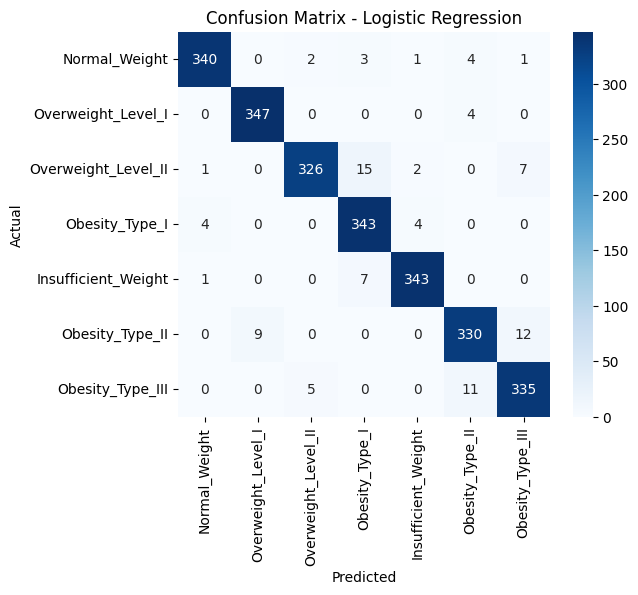

In [566]:
# Menghitung confusion matrix untuk Logistic Regression
cm_lr = confusion_matrix(y_resampled, y_pred_lr)

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=df['NObeyesdad'].unique(), yticklabels=df['NObeyesdad'].unique())
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<ipython-input-567-bfafcec49f39>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Akurasi', y='Model', data=comparison_df, palette='viridis')


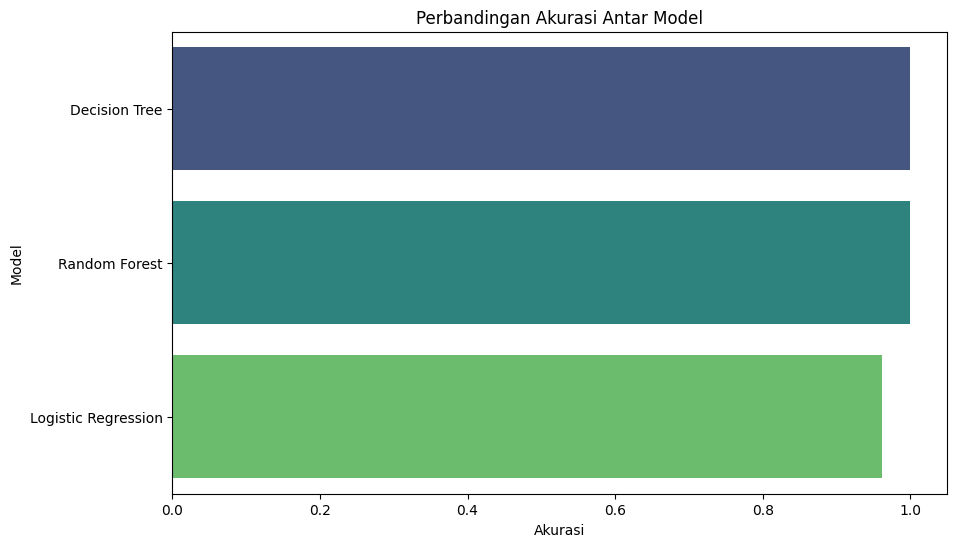

Decision Tree Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00       351
      Normal_Weight       1.00      1.00      1.00       351
     Obesity_Type_I       1.00      1.00      1.00       351
    Obesity_Type_II       1.00      1.00      1.00       351
   Obesity_Type_III       1.00      1.00      1.00       351
 Overweight_Level_I       1.00      1.00      1.00       351
Overweight_Level_II       1.00      1.00      1.00       351

           accuracy                           1.00      2457
          macro avg       1.00      1.00      1.00      2457
       weighted avg       1.00      1.00      1.00      2457


Random Forest Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00       351
      Normal_Weight       1.00      1.00      1.00       351
     Obesity_Type_I       1.00      1.00      1.00       351
    Ob

In [567]:
# Menyusun hasil akurasi untuk komparasi
results = {
    'Model': ['Decision Tree', 'Random Forest', 'Logistic Regression'],
    'Akurasi': [accuracy_dt, accuracy_rf, accuracy_lr]
}

# Membuat DataFrame untuk komparasi
comparison_df = pd.DataFrame(results)

# Menampilkan perbandingan hasil akurasi antar model
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Akurasi', y='Model', data=comparison_df, palette='viridis')
plt.title('Perbandingan Akurasi Antar Model')
plt.show()

# Menampilkan laporan lengkap perbandingan (precision, recall, F1-score)
print("Decision Tree Classification Report:")
print(classification_report(y_resampled, y_pred_dt))
print("\nRandom Forest Classification Report:")
print(classification_report(y_resampled, y_pred_rf))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_resampled, y_pred_lr))
